# Assignment 2

In [1]:
# read neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

### Customer database
Given is a table *orders* with product orders, and a table *customers* with customer info. Merge the two tables together such that the remaining table only has orders for which customer info is available. Assign the final table to the variable *sales*.

In [2]:
orders = pd.DataFrame({'OrderID' : [1, 2, 3, 4, 5, 6, 7],
                       'CustID' : [1, 4, 3, 4, 1, 4, 5], 
                       'Amount' : [23.20, 2.30, 12.93, 54.92, 6.12, 9.60, 70.56]})

customers = pd.DataFrame({'ID' : [1, 2, 3, 4, 6], 
                          'First' : ["Henk", "Petra", "Sjoerd", "Mieke", "Sandjai"], 
                          'Last' : ["Janssen", "de Klomp", "Vermeulen", "Sterk", "Bhulai"],
                          'City' : ["Amsterdam", "Nijmegen", "Maastricht", "Amsterdam", "Diemen"]})

# YOUR CODE HERE
sales = pd.merge(customers, orders, left_on='ID', right_on='CustID')
print(sales)
# YOUR CODE ENDS HERE

   ID   First       Last        City  OrderID  CustID  Amount
0   1    Henk    Janssen   Amsterdam        1       1   23.20
1   1    Henk    Janssen   Amsterdam        5       1    6.12
2   3  Sjoerd  Vermeulen  Maastricht        3       3   12.93
3   4   Mieke      Sterk   Amsterdam        2       4    2.30
4   4   Mieke      Sterk   Amsterdam        4       4   54.92
5   4   Mieke      Sterk   Amsterdam        6       4    9.60


The customer ID of "Sandjai Bhulai" is wrong. It should be 5 instead of 6. Correct the ID and calculate the sum of the sales values for each city. Assign the resulting table with only the total amount of sales to the variable *sales_per_city*.

In [3]:
# YOUR CODE HERE
customers.loc[(customers['First'] == 'Sandjai') & (customers['Last'] == 'Bhulai'), 'ID'] = 5
sales = pd.merge(customers, orders, left_on='ID', right_on='CustID')
sales_per_city = sales.groupby(by='City')['Amount'].sum()

print(sales_per_city)
# YOUR CODE ENDS HERE

City
Amsterdam     96.14
Diemen        70.56
Maastricht    12.93
Name: Amount, dtype: float64


From the *sales* dataframe, create a new dataframe with as first column the first name (*First*) and the second column the sales amount (*Amount*). Assign this to the variable *new_sales*. Then calculate the total sales amount per person and assign that to the variable *person*. Create a bar plot of the resulting dataframe.

     First  Amount
0     Henk   23.20
1     Henk    6.12
2   Sjoerd   12.93
3    Mieke    2.30
4    Mieke   54.92
5    Mieke    9.60
6  Sandjai   70.56

         Amount
First          
Henk      29.32
Mieke     66.82
Sandjai   70.56
Sjoerd    12.93


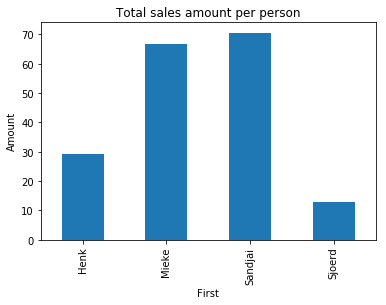

In [4]:
# YOUR CODE HERE
new_sales = sales[['First', 'Amount']]
person = new_sales.groupby(by='First').sum()
print(new_sales)
print()
print(person)
bar_plot = person.plot.bar(title = 'Total sales amount per person', legend=False)
bar_plot.set_ylabel('Amount');
# YOUR CODE ENDS HERE

### Course grades
The text that is listed below misses a separator between the courses and the grades. Create a regular expression to extract all the grades from the text and assign that value to the variable *avg_grade*. Note that you may have to cast the number (that are represented as strings) to floating point numbers.

In [5]:
import re
text = """Data_wrangling8.5
Machine_learning9.0
Advanced_machine_learning8.0
Reinforcement_learning7.5
"""

# YOUR CODE HERE
pattern = r'\d+\.\d+'
# YOUR CODE ENDS HERE

regex = re.compile(pattern, flags=re.IGNORECASE)
result = regex.findall(text)

# YOUR CODE HERE
avg_grade = sum([float(i)for i in result])/len(result)
print(avg_grade)
# YOUR CODE ENDS HERE

8.25


### E-mail
Consider the following excerpt from an email. Write a regular expression that extracts the sender, recipient and the subject from the email.

In [6]:
import re
text = """From: Sandjai
To: the students following data wrangling
Subject: well done!
Body: I congratulate you all with mastering regular expressions.
It is a tough subject to learn. Good job.
"""

# YOUR CODE HERE
pattern = r'From: ([\w\s]+)\nTo: ([\w\s]+)\nSubject: ([\w\s _.,!?\$]+)\n' 
# YOUR CODE ENDS HERE

regex = re.compile(pattern, flags=re.IGNORECASE)
result = regex.match(text).groups()

print('{} says "{}" to {}'.format(result[0], result[2], result[1]))

Sandjai says "well done!" to the students following data wrangling


### Orange juice
The file below contains sales data on three brands of orange juice over different weeks over different stores. Find out which store number has the highest and lowest mean income (using the variable *INCOME*). Assign the store numbers to the variables *max_store* and *min_store*, respectively.


In [7]:
oj = pd.read_csv('oj.csv')

# YOUR CODE HERE
groups_income = oj.groupby(by='store')['INCOME'].mean()

max_store = groups_income.idxmax()
print("The store with the highest mean income: ", max_store)
min_store = groups_income.idxmin()
print("The store with the lowest mean income: ", min_store)
# YOUR CODE ENDS HERE

The store with the highest mean income:  62
The store with the lowest mean income:  75


Create a dataframe with two rows (one for the best store *max_store*, and one for the worst store *min_store*). The columns are the weeks *week* of the orange juice dataset. The values in the dataframe are the sum of the sales (*logmove*) of all three brands. Assign the dataframe to the variable *store_sales*. Then create a plot of the sales with on the x-axis the weeks, and on the y-axis the sum of the sales (the sum of the *logmove*).

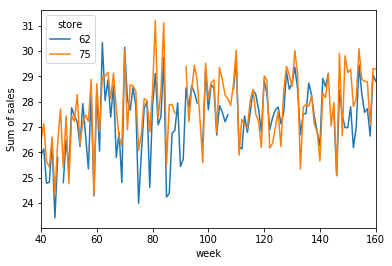

In [8]:
# YOURCODE HERE
store_sales = oj[(oj['store'] == max_store) | (oj['store'] == min_store)].pivot_table('logmove', index=['store'], columns='week', aggfunc='sum')
plot = store_sales.T.plot()
plot.set_ylabel('Sum of sales');
# YOUR CODE ENDS HERE

The previous picture does not explain why the best store does better than the worst store. Let study if the price influences the sales. Prepare a dataframe with two columns (the column *price* and the column *logmove*), with records only related to *max_store*. Assign this dataframe to variable *oj1*. Also create a table with the *price* and *logmove* with only records for store *min_store*. Assign this dataframe to variable *oj2*. 

In [9]:
import statsmodels.api as sm

# YOUR CODE HERE
oj1 = oj.loc[oj['store'] == max_store, ['price', 'logmove']]

oj2 = oj.loc[oj['store'] == min_store, ['price', 'logmove']]
# YOUR CODE ENDS HERE

fit1 = sm.OLS(oj1['logmove'], sm.add_constant(oj1['price'])).fit()
fit2 = sm.OLS(oj2['logmove'], sm.add_constant(oj2['price'])).fit()

print(fit1.params)
print(fit2.params)

const    9.153937
price   -0.014614
dtype: float64
const    10.876949
price    -0.672225
dtype: float64


/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The previous analysis explains the difference between the two stores. The best store has almost no sensitivity to the price. The worst store has a high negative sensitivity to the price. Hence, the best store can charge higher prices than the worst store.

Let us now see which brand is the most popular. Create a dataframe in with the three brands (*brand*) and the total number of the sales (sum of *logmove*). Assign the result to the variable *brand_sales*.

In [10]:
# YOUR CODE HERE
brand_sales = oj.groupby(by='brand')['logmove'].sum()
print(brand_sales)
# YOUR CODE ENDS HERE

brand
dominicks      88527.943226
minute.maid    88937.517267
tropicana      87916.698522
Name: logmove, dtype: float64


The column *feat* determines if the orange juice is on sale. Create a table with as row the different brands of orange juice (*brand*) and as columns the indicator for the sale (*feat*). The values in the table contain the mean price of the specific orange juices. Assign the value to the variable *featured*.

In [11]:
# YOUR CODE HERE
featured = oj.pivot_table('price', index=['brand'], columns='feat', aggfunc='mean')
print(featured)
# YOUR CODE ENDS HERE

feat                0         1
brand                          
dominicks    1.795460  1.563375
minute.maid  2.328877  2.024867
tropicana    2.966131  2.390817
